In [3]:
import streamlit as st
import tweepy
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
# Import API key
from config import consumerKey
from config import consumerSecret
from config import accessToken
from config import accessTokenSecret

In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

In [5]:
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

In [6]:
# Creating the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)
api

In [7]:
posts = api.search(
    q="@DanAndrewsmp -RT", result_type='recent', count=100, lang="en", tweet_mode="extended")

In [8]:
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])
df

,Tweets
0,"The Govenment: ""We humbly respect this is the ..."
1,The job is not done until @DanAndrewsMP is in ...
2,this is not a win @DanAndrewsMP federal court ...
3,@harryrhart @DanAndrewsMP It truly is unbeliev...
4,This really does not look good @DanAndrewsMP. ...
...,...
95,@TimWilsonMP @DanAndrewsMP There is no contrac...
96,@TimWilsonMP @DanAndrewsMP 'Despicable' and 'b...
97,@TimWilsonMP @DanAndrewsMP This tiresome whing...
98,@7NewsAustralia Yet they are still in lock dow...


In [37]:
#Create a function to clean the tweets:
def cleanTxt(text):
    # Removing @mentions
    text = re.sub('@[A-Za-z0–9]+', ' ', text)
    # Removing '#' hash tag symbol
    text = re.sub('#', '', text)
     # Removing ': hash tag symbol
    text = re.sub(':', '', text)
    # Removing RT re-tweet
    text = re.sub('RT[\s]+', '', text)
    # Removing hyperlink
    text = re.sub('https:\/\/\S+', '', text)
    # Removing hyperlink
    text = re.sub('http:\/\/\S+', '', text)
    
    return text

In [38]:
df["Tweets"] = df["Tweets"].apply(cleanTxt)
df["Tweets"]

0     The Govenment "We humbly respect this is the l...
1     The job is not done until   is in jail! Nothin...
2     this is not a win   federal court decisions we...
3         It truly is unbelievable mate, what used t...
4     This really does not look good  . I understand...
                            ...                        
95               There is no contract stop bullshitting
96        'Despicable' and 'blaming'. I think those ...
97        This tiresome whinging is driving me bonke...
98    @7NewsAustralia Yet they are still in lock dow...
99        Gee Timmy not a very bright tweet\nbut the...
Name: Tweets, Length: 100, dtype: object

In [39]:
df= df.dropna()

In [40]:
df= df.drop_duplicates()

In [41]:
df.count()

Tweets       100
Sentiment    100
dtype: int64

In [42]:
##Get the independent features
X = df["Tweets"]

In [43]:
X.shape

(100,)

In [44]:
messages = X.copy()

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

## Pre-processing the tweets to fit our ML model

In [47]:
import nltk
import re
from nltk.corpus import stopwords

In [48]:
#In order to remove words that are not meanningful (e.g. the, a, then, often...), we need to download those words.
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Babette\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
##Data Preprocessing/Cleaning
from nltk.stem.porter import PorterStemmer
#Initialise PorterStemmer for Stemming
ps = PorterStemmer()
#Create an empty list named corpus that will contain our cleaned sentences and words
corpus = []
#Create a loop to clean all the text in messages:
for i in range(0, len(messages)):
    #print index
    print(i)
    #use re (regular expressions) to substitute all characters except [a-zA-Z] by blank in message 'text'
    review = re.sub('[^a-zA-Z]', ' ', messages[i])
    #convert all the characters as lower case
    review = review.lower()
    #split all the words in each sentence to be able to later remove the stopwords
    review = review.split()
    
    #create a loop in review: for each word in review, keep only words that are not stopwords list and apply 'Stemming'
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    #join words with a space to build the review
    review = ' '.join(review)
    #append the review into the corpus
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [50]:
#Checking the new sentences in the corpus
for i in range(0,10):
    print(corpus[i])

goven humbl respect land tradit belong indigen tribe also govern actual say land use today fuck http co tgxicwbtt
job done jail noth less good enough http co zn rqgkz
win feder court decis made decemb consult ignor first nation peopl arrest criminalis protest ignor feder court process white australia asham http co sokjanxcp
truli unbeliev mate use know stockholm syndrom known melbourn syndrom
realli look good understand restrict gather number due covid sure flexibl make road safe without destroy tree pleas full stori http co pzcugz g
frydenberg pride wound notaleaderjustaliber jibe show number auspol http co pzyzsdt e
agre one mani leader life experi beyond polit http co zbhn eou
gonna leav must miss dialogu occur victoria plenti good point rais worth listen take finger ear easier hear http co xjlu k covid vicdata
terribl govt blame other would ever stoop low oh right feder gover self righteou http co qy opjo iw
top shelf lucki peopl even job vic thank new visit rule come crap day real

## One-Hot representation of words/sentences

In [51]:
#Apply One_hot representation for each word in the corpus based on the voc_size - each word is allocated a number within the sentence.
voc_size = 5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2830,
  1648,
  285,
  4252,
  2502,
  4661,
  505,
  3789,
  54,
  1682,
  990,
  2003,
  4252,
  3696,
  1471,
  1598,
  3995,
  1529,
  3027],
 [452, 4547, 2176, 3129, 272, 3837, 3385, 3995, 1529, 4021, 3643],
 [4107,
  3334,
  3,
  4547,
  4358,
  3126,
  3528,
  4314,
  2333,
  1714,
  4142,
  1097,
  4914,
  159,
  4314,
  3334,
  3,
  4279,
  359,
  3371,
  39,
  3995,
  1529,
  2041],
 [1761, 4100, 1916, 3696, 3774, 1241, 2806, 2388, 2725, 2806],
 [2500,
  899,
  3837,
  3723,
  1073,
  550,
  706,
  2410,
  116,
  2961,
  2645,
  3040,
  2542,
  3040,
  4413,
  4836,
  983,
  2289,
  1669,
  2016,
  3995,
  1529,
  4219,
  4774],
 [4493, 2470, 4445, 2266, 3873, 1211, 706, 465, 3995, 1529, 2340, 1304],
 [3259, 2995, 3406, 2059, 4105, 602, 3980, 1585, 3995, 1529, 3126, 273],
 [2337,
  1226,
  4268,
  2921,
  3104,
  3873,
  2014,
  3374,
  3837,
  1500,
  2440,
  205,
  4177,
  3330,
  655,
  2655,
  536,
  4272,
  3995,
  1529,
  1925,
  3803,
  116,
  3730],
 [754,
  775,
  

In [52]:
#Checking the maximum length of all sentences.
number_words=[]
for i in range(0,len(messages)):
    number_words.append(len(onehot_repr[i]))

In [53]:
import numpy as np

## Word Embedding

In [54]:
#Use pad sequencing to ensure all sentences are the same length.
#Set up the common length of each sentence. 31 words as per our trained modle
sent_length=31
#Embebbed each sentence as a matrix
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3995 1529 3027]
 [   0    0    0 ... 1529 4021 3643]
 [   0    0    0 ... 3995 1529 2041]
 ...
 [   0    0    0 ... 1529 4001 1214]
 [   0    0    0 ... 1219 2003 3527]
 [   0    0    0 ... 4518  423 1811]]


In [55]:
#Check first sentence embedded with 31 words
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 2830, 1648,  285, 4252, 2502, 4661,  505, 3789,   54, 1682,
        990, 2003, 4252, 3696, 1471, 1598, 3995, 1529, 3027])

In [56]:
#Checking the shape of embedded_docs
len(embedded_docs)

100

In [57]:
#Storing embedded_docs into an array
X_final = np.array(embedded_docs)
X_final

array([[   0,    0,    0, ..., 3995, 1529, 3027],
       [   0,    0,    0, ..., 1529, 4021, 3643],
       [   0,    0,    0, ..., 3995, 1529, 2041],
       ...,
       [   0,    0,    0, ..., 1529, 4001, 1214],
       [   0,    0,    0, ..., 1219, 2003, 3527],
       [   0,    0,    0, ..., 4518,  423, 1811]])

## Loading the model and predicting the values

In [58]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("Datasets/tweeter_ml_trained_50000.h5")

In [59]:
#Predict y values on X_final
y_pred=model.predict_classes(X_final)

In [60]:
df["Sentiment"] = y_pred
df.head(10)

,Tweets,Sentiment
0,"The Govenment ""We humbly respect this is the l...",1
1,The job is not done until is in jail! Nothin...,1
2,this is not a win federal court decisions we...,0
3,"It truly is unbelievable mate, what used t...",0
4,This really does not look good . I understand...,1
5,😂Frydenberg pride wounded by NotALeaderJustALi...,1
6,"Agree, is one of too many “leaders” who have...",1
7,Just gonna leave this here... \nI must have mi...,0
8,Isn't that terrible. A govt blaming other...,0
9,top shelf? Lucky you!! Most people don’t eve...,1


In [61]:
df["Sentiment"].value_counts()

1    73
0    27
Name: Sentiment, dtype: int64

In [62]:
for i in range (0,10):
    print(df["Tweets"][i])

The Govenment "We humbly respect this is the land traditionally belonging to an indigenous tribe..."
Also the Government "...who don't have any actual say in how the land is used today!"

What the fuck is this,  ? https//t.co/TgXicWBtts
The job is not done until   is in jail! Nothing less is good enough.    https//t.co/04zN0RQGkz
this is not a win   federal court decisions were to be made in December. consulting and then ignoring our First Nations people, arresting them, criminalising their protest, while ignoring federal court process. you are white australia. i am ashamed. https//t.co/8soKjaNXcp
    It truly is unbelievable mate, what used to be know as Stockholm syndrome will now be known as Melbourne syndrome.
This really does not look good  . I understand restrictions on gathering numbers due to Covid-19. But surely there's some flexibility - to make the road safe without destroying these trees. Please - what is the full story here? https//t.co/pZcUgZe8G5
😂Frydenberg pride wounded

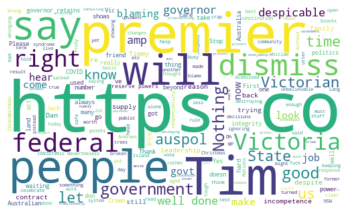

In [63]:
##Word Cloud
Words = " ".join( [tweets for tweets in df["Tweets"]] )
wordCloud = WordCloud (width = 500, height = 300, random_state = 21, max_font_size = 110,background_color="white").generate(Words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [64]:
def Word_Cloud(df_column):
    df_column = df_column.apply(cleanTxt)
    # Join all the tweets in Df["Tweets"] by a space
    Words = " ".join([tweets for tweets in df_column])
    wordcloud = WordCloud(width=500, height=300, random_state=21,
                          max_font_size=110, background_color="white").generate(Words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    img = wordcloud.to_file("img/word_cloud.png")
    return img